<a href="https://colab.research.google.com/github/virdakristy/Tugas-DL_3/blob/main/tugas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://youtu.be/hraKTseOuJA

"""
Dataset from here: https://www.kaggle.com/datasets/virdakristy/dataset-multileble-peralatan-memasak
"""

'\nDataset from here: https://www.kaggle.com/datasets/virdakristy/dataset-multileble-peralatan-memasak\n'

In [ ]:
!pip install -q kaggle

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [ ]:
#image_directory = 'Dataset_Multileble_peralatan_memasak/images/'

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("virdakristy/dataset-multileble-peralatan-memasak")

#print("Path to dataset files:", path)

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "virdakristy" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "/content/kaggle.json" # Ganti dengan key yang ada di kaggle.json

In [ ]:
!kaggle datasets download virdakristy/dataset-multileble-peralatan-memasak

Dataset URL: https://www.kaggle.com/datasets/virdakristy/dataset-multileble-peralatan-memasak
License(s): CC0-1.0
100% 1.33G/1.34G [00:22<00:00, 87.4MB/s]
100% 1.34G/1.34G [00:22<00:00, 63.4MB/s]


In [ ]:
# prompt: multileble-peralatan-memasak.zip

!unzip dataset-multileble-peralatan-memasak.zip

Archive:  dataset-multileble-peralatan-memasak.zip
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida001.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida002.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida003.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida004.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida005.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida006.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida007.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida008.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida009.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida010.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida011.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida012.jpg  
  inflating: DatasetMultileble_Virda Kristy_202255202064/ida013.jpg  
  inflating: DatasetMultileble_Virda Kr

In [ ]:
#Now let us read metadata to get our Y values (multiple lables)
# Try reading with semicolon as delimiter
try:
    df = pd.read_csv('//content/traindataset_virda kristy_202255202064.csv', sep=';')
    print("Read with semicolon delimiter successful.")
except pd.errors.ParserError: # Changed to pd.errors.ParserError for clarity
    print("Reading with semicolon delimiter failed. Trying default comma delimiter (might still fail).")
    df = pd.read_csv('/content/traindataset_virda kristy_202255202064.csv')

print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000].reset_index(drop=True)  #Loading only first 2000 datapoints and reset the index
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

Read with semicolon delimiter successful.
       id   alat-alat masak  pisau  talenan  saringan  spatula  wajan
0  ida001  spatula, talenan      0        1         0        1      0
1  ida002    wajan, talenan      0        1         0        0      1
2  ida003  spatula, talenan      0        1         0        1      0
3  ida004  spatula, talenan      0        1         0        1      0
4  ida005  spatula, talenan      0        1         0        1      0
Index(['id', 'alat-alat masak', 'pisau', 'talenan', 'saringan', 'spatula',
       'wajan'],
      dtype='object')


In [ ]:
!ls /content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!ls {image_directory} | head -n 20

ls: cannot access '{image_directory}': No such file or directory


In [ ]:
SIZE = 200
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/DatasetMultileble_Virda Kristy_202255202064/' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Added '/' as a separator between image_directory and filename
    # Changed 'Id' to 'id' to match the actual column name in the DataFrame
    img = image.load_img(image_directory + '/' + df['id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 345/345 [00:59<00:00,  5.81it/s]


In [ ]:
#
#print(df['id'][500])  #This line was causing an error if index 500 does not exist
print(df['id'][df.shape[0] - 1]) # Accessing the 'id' of the last row

ida345


In [ ]:
# Print the 'alat-alat masak' value for an index within the valid range.
# For example, print the value for the last row:
print(df['alat-alat masak'][df.shape[0] - 1])
# Or if you want to print a value at a specific index, make sure that index is less than df.shape[0].
# For instance, printing the value at index 300 (which is less than 345):
# print(df['alat-alat masak'][300])

wajan, pisau


In [ ]:
# Assuming 'alat-alat masak' is the column with your labels
# The values in this column are likely strings with multiple labels separated by commas.
# You need to split these strings and find all unique labels across the entire dataset.

# Example of how to find unique labels (you might need to adjust based on your data format):
all_labels = set()
for labels_str in df['alat-alat masak']:
    # Assuming labels are comma-separated (adjust if needed)
    labels = [label.strip() for label in labels_str.split(',')]
    all_labels.update(labels)

num_unique_labels = len(all_labels)

print(f"Jumlah label unik yang ditemukan: {num_unique_labels}")

# Check if the number of unique labels matches the model's output layer
if num_unique_labels != 25:
    print(f"Peringatan: Jumlah label unik ({num_unique_labels}) tidak cocok dengan lapisan output model ({25}).")
    print("Harap sesuaikan lapisan dense terakhir model Anda agar memiliki jumlah unit yang benar atau periksa kembali persiapan data Anda.")

# Anda kemudian akan melanjutkan untuk membuat y_data sebagai array multi-hot encoded dengan num_unique_labels kolom.

# --- Start of suggested changes ---
# Redefine the model with the correct number of output units
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Change the number of units in the final dense layer to match the number of unique labels
model.add(Dense(num_unique_labels, activation='sigmoid'))

# --- End of suggested changes ---


#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

# Binary cross entropy of each label. So no really a binary classification problem but
# Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Jalankan pelatihan model
# X_train: Data gambar untuk pelatihan
# y_train: Label multi-hot encoded untuk pelatihan
# epochs: Jumlah iterasi pelatihan (misal: 400)
# validation_data: Tuple (X_test, y_test) untuk evaluasi pada data validasi
# batch_size: Ukuran batch untuk setiap langkah pelatihan
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test), batch_size=32)

# Objek history akan berisi informasi tentang pelatihan, seperti loss dan akurasi di setiap epoch
# Anda dapat menggunakan objek history ini untuk memvisualisasikan hasil pelatihan nantinya.

Jumlah label unik yang ditemukan: 6
Peringatan: Jumlah label unik (6) tidak cocok dengan lapisan output model (25).
Harap sesuaikan lapisan dense terakhir model Anda agar memiliki jumlah unit yang benar atau periksa kembali persiapan data Anda.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,542 (2.68 MB)

 Trainable params: 701,190 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2907 - loss: 0.9923 - val_accuracy: 0.2464 - val_loss: 0.6543
Epoch 2/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2528 - loss: 0.6759 - val_accuracy: 0.3333 - val_loss: 0.6567
Epoch 3/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3315 - loss: 0.6032 - val_accuracy: 0.1884 - val_loss: 0.6432
Epoch 4/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3085 - loss: 0.5852 - val_accuracy: 0.1739 - val_loss: 0.6390
Epoch 5/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2755 - loss: 0.5093 - val_accuracy: 0.1739 - val_loss: 0.6359
Epoch 6/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2171 - loss: 0.5280 - val_accuracy: 0.1739 - val_loss: 0.6961
Epoch 7/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2599 - loss: 0.4764 - val_accuracy: 0.1739 - val_loss: 0.8052
Epoch 8/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2763 - loss: 0.4624 - val_accuracy: 0.1739 - val_loss: 0.9656


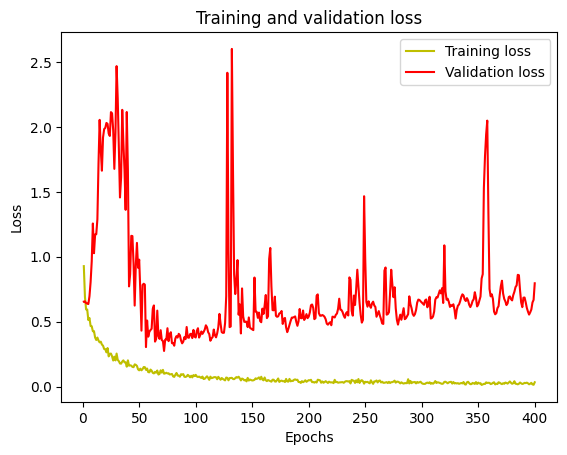

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

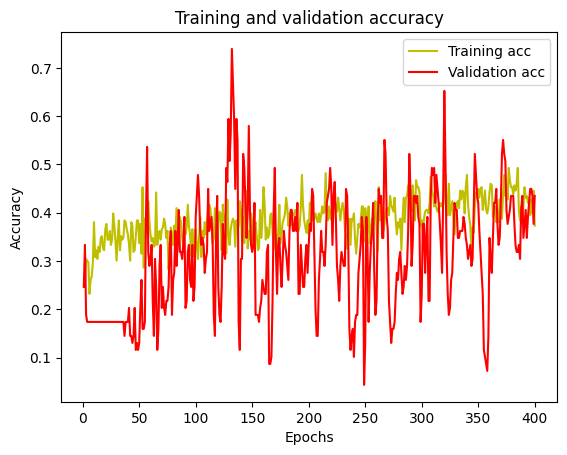

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


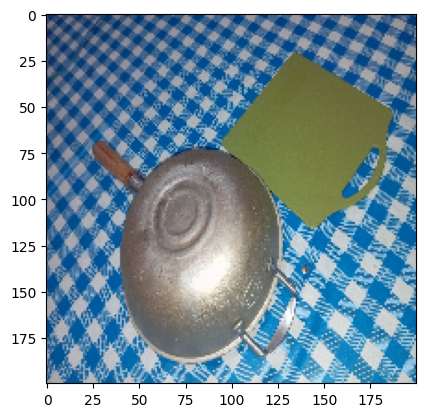

In [ ]:
#Validate on an image
#img = image.load_img('/content/DatasetMultileble_Virda Kristy_202255202064/ida021.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/DatasetMultileble_Virda Kristy_202255202064'
img = image.load_img('/content/DatasetMultileble_Virda Kristy_202255202064/ida021.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [ ]:
# Print classes and corresponding probabilities

# Instead of using df.columns[2:], use the list of unique labels found earlier
# Assuming 'all_labels' variable from the previous cell holds the set of unique labels
# Convert the set to a list to allow indexing
classes = list(all_labels)

# Ensure the classes are in a consistent order, maybe by sorting
classes.sort()

# Now, classes should have 'num_unique_labels' elements, matching the model output.

for i in range(len(sorted_categories)):
    # Access the class name using the sorted index
    print("{}".format(classes[sorted_categories[i]]) + " ({:.3f})".format(proba[0][sorted_categories[i]]))

talenan (1.000)
wajan (1.000)
spatula (0.003)
pisau (0.001)
saringan (0.000)
wajaln (0.000)


In [ ]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.4205 - loss: 0.8910
Accuracy =  43.478259444236755 %


In [ ]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step
              precision    recall  f1-score   support

       pisau       0.94      0.92      0.93        48
    saringan       0.76      0.94      0.84        34
     spatula       0.87      0.93      0.90        43
     talenan       0.97      0.94      0.96        36
      wajaln       0.00      0.00      0.00         1
       wajan       0.94      0.97      0.96        35

   micro avg       0.89      0.93      0.91       197
   macro avg       0.75      0.78      0.76       197
weighted avg       0.89      0.93      0.91       197
 samples avg       0.90      0.93      0.91       197

Confusion Matrix for pisau:
[[18  3]
 [ 4 44]]
Confusion Matrix for saringan:
[[25 10]
 [ 2 32]]
Confusion Matrix for spatula:
[[20  6]
 [ 3 40]]
Confusion Matrix for talenan:
[[32  1]
 [ 2 34]]
Confusion Matrix for wajaln:
[[68  0]
 [ 1  0]]
Confusion Matrix for wajan:
[[32  2]
 [ 1 34]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
